Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 01 loss = 3.141508753
Epoch: 02 loss = 1.158293765
Epoch: 03 loss = 0.919495532
Epoch: 04 loss = 0.799615721
Epoch: 05 loss = 0.723769659
Epoch: 06 loss = 0.669032321
Epoch: 07 loss = 0.627817764
Epoch: 08 loss = 0.595257270
Epoch: 09 loss = 0.568860739
Epoch: 10 loss = 0.545792128
Epoch: 11 loss = 0.526783916
Epoch: 12 loss = 0.510143149
Epoch: 13 loss = 0.495548855
Epoch: 14 loss = 0.482694158
Epoch: 15 loss = 0.470924134
Accuracy:  0.8838
Label: [4]
Prediction: [4]


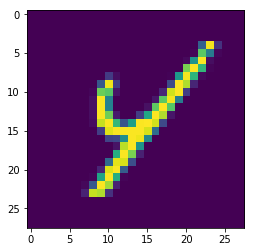

In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

from tensorflow.examples.tutorials.mnist import input_data
# check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

num_feature = 28 * 28
num_class = 10

X = tf.placeholder(tf.float32, shape=[None,num_feature])
Y = tf.placeholder(tf.float32, shape=[None,num_class])
W = tf.Variable(tf.random_normal([num_feature, num_class]), name = 'weight')
b = tf.Variable(tf.random_normal([num_class]), name = 'bias')

h = tf.nn.softmax(tf.matmul(X, W) + b)
loss = -tf.reduce_mean(tf.reduce_sum(Y * tf.log(h), axis=1))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(loss)


is_correct = tf.equal(tf.argmax(h, 1), tf.argmax(Y, 1))
acc = tf.reduce_mean(tf.cast(is_correct, tf.float32))

epoch = 15
batch_size = 100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(epoch):
        avg_loss = 0
        batches = int(mnist.train.num_examples/ batch_size)
        for i in range(batches):
            x_batch, y_batch = mnist.train.next_batch(batch_size)
            feed = {X: x_batch, Y: y_batch}
            _, l = sess.run([train, loss], feed_dict = feed)
            avg_loss += l/ batches
        print('Epoch:', '%02d' % (step+1), 'loss =', '{:.9f}'.format(avg_loss))
    print("Accuracy: ", acc.eval(session=sess, 
                                 feed_dict={X:mnist.test.images, Y:mnist.test.labels}))
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)))
    print("Prediction:", sess.run(tf.argmax(h, 1), feed_dict=
                                  {X:mnist.test.images[r:r+1]}))
    plt.imshow(mnist.test.images[r].reshape(28, 28))
    plt.show()